In [56]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline

In [21]:
url = 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
df = pd.read_csv(url)

In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


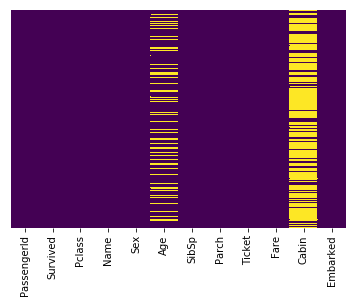

In [23]:
sb.heatmap(df.isnull(),cbar=False,cmap = 'viridis',yticklabels=False)

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
df.Embarked.isnull().sum()

2

In [8]:
df.Cabin.isnull().sum()

687

In [14]:
#Age is a continuous variable .It contains 177 null varibales
#Imputing null values in Age column with median of Age values
df['Age'] = df['Age'].fillna(df['Age'].median())

In [9]:
df.Age.isnull().sum()

177

In [10]:
df_titanic = df.drop('Cabin',axis=1)

In [11]:
#drop null values from df_titanic
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [12]:
#Embarked column contains 2 null values .This can be removed without much affecting the model algorithm
df_titanic.dropna(inplace=True)

In [13]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Ticket         712 non-null object
Fare           712 non-null float64
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


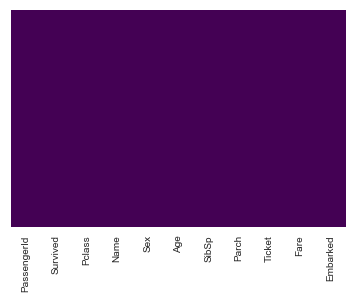

In [31]:
sb.heatmap(df_titanic.isnull(),cbar=False,cmap = 'viridis',yticklabels=False)

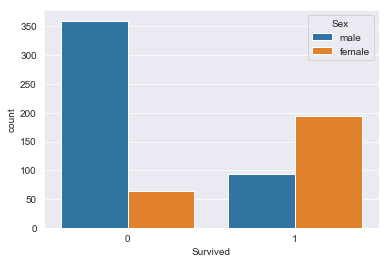

In [27]:
sb.set_style('darkgrid')
sb.countplot(data = df_titanic,x='Survived',hue = 'Sex')

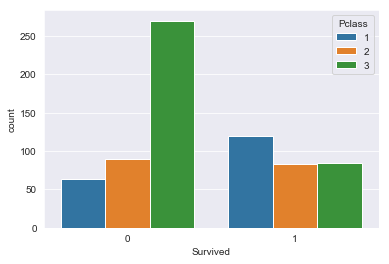

In [30]:
sb.countplot(x = 'Survived',data=df_titanic,hue='Pclass')

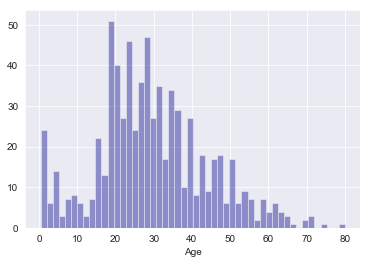

In [29]:
sb.distplot(df_titanic['Age'].dropna(),kde = False,bins= 50,color = 'darkblue')

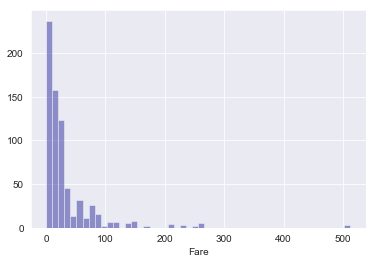

In [32]:
sb.distplot(df_titanic['Fare'],kde = False,color = 'darkblue')

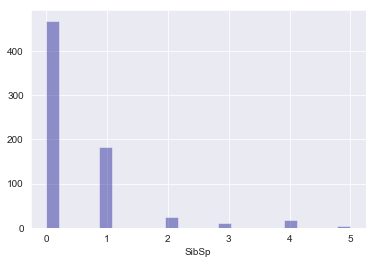

In [35]:
sb.distplot(df_titanic['SibSp'],kde = False,color = 'darkblue')

In [39]:
sex = pd.get_dummies(df_titanic['Sex'],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [40]:
embark = pd.get_dummies(df_titanic['Embarked'],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [41]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [43]:
df_titanic.drop(['Name','Sex','Ticket','Embarked','PassengerId'],axis=1,inplace= True)

In [46]:
df_titanic1 = pd.concat([df_titanic,sex,embark],axis=1)
df_titanic1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [47]:
x_train,x_test,y_train,y_test = train_test_split(train.drop('Survived',axis = 1),train['Survived'],test_size = 0.30,random_state = 101)

In [48]:
logmodel = LogisticRegression()

In [49]:
logmodel.fit(x_train,y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [50]:
predictions = logmodel.predict(x_test)

In [54]:
print(confusion_matrix(y_test,predictions))

[[106  22]
 [ 26  60]]


In [55]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       128
           1       0.73      0.70      0.71        86

   micro avg       0.78      0.78      0.78       214
   macro avg       0.77      0.76      0.76       214
weighted avg       0.77      0.78      0.77       214

